## NEW REPLACEMENT
## Exploring ELI data frame
#### Ting-Wei Shen, tis50@pitt.edu, Mar19, 2019

### Loading choosed data

In [1]:
# Import all packages on top
import nltk, glob, re
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Turn off pretty printing 
%pprint

Pretty printing has been turned OFF


In [2]:
sns.set_style('darkgrid')

- First, check about answer.csv

In [3]:
df_answer = pd.read_csv("./data/answer.csv")
print(df_answer.shape)
df_answer.head(10)

(46239, 6)


,answer_id,question_id,anon_id,user_file_id,text,is_deleted
0,1,5,eq0,7505,I met my friend Nife while I was studying in a...,0
1,2,5,am8,7506,"Ten years ago, I met a women on the train betw...",0
2,3,12,dk5,7507,In my country we usually don't use tea bags. F...,0
3,4,13,dk5,7507,I organized the instructions by time.,0
4,5,12,ad1,7508,"First, prepare a port, loose tea, and cup.\nSe...",0
5,6,13,ad1,7508,By time,0
6,7,12,eg5,7509,"First, prepare your cup, loose tea or bag tea,...",0
7,8,13,eg5,7509,"I organized the instructions by time, beacause...",0
8,9,12,ad1,7510,"First, prepare a port, loose tea, and cup.\nSe...",0
9,10,13,ad1,7510,By time,0


- I choose student_id(anon_id), question_id and text data to help me know the dataframe. Who write the essay with what kind of questions. 

- What we need are anon_id, question_id and text data.

In [4]:
df_eli = pd.DataFrame()
df_eli = df_answer[['anon_id', 'question_id', 'text']]
print(df_eli.shape)
df_eli.head()

(46239, 3)


,anon_id,question_id,text
0,eq0,5,I met my friend Nife while I was studying in a...
1,am8,5,"Ten years ago, I met a women on the train betw..."
2,dk5,12,In my country we usually don't use tea bags. F...
3,dk5,13,I organized the instructions by time.
4,ad1,12,"First, prepare a port, loose tea, and cup.\nSe..."


- Second, check about student information

In [5]:
df_student = pd.read_csv("./data/student_information.csv")
print(df_student.shape)
df_student.head()

(913, 21)


,anon_id,gender,birth_year,native_language,language_used_at_home,language_used_at_home_now,non_native_language_1,yrs_of_study_lang1,study_in_classroom_lang1,ways_of_study_lang1,...,yrs_of_study_lang2,study_in_classroom_lang2,ways_of_study_lang2,non_native_language_3,yrs_of_study_lang3,study_in_classroom_lang3,ways_of_study_lang3,createddate,modifieddate,course_history
0,ez9,Male,1978,Arabic,Arabic,NaN,English,more than 5 years,1.0,Studied grammar;Worked in pairs/groups;Studied...,...,less than 1 year,0.0,Studied by myself,NaN,NaN,0.0,NaN,2006-01-30 15:07:18,2006-03-14 15:13:37,6;12;18;24;30
1,gm3,Male,1980,Arabic,Arabic,NaN,English,more than 5 years,1.0,Studied grammar;Had a native-speaker teacher;S...,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,2006-01-30 15:07:28,2006-03-14 15:12:49,6;12;24;30;38
2,fg5,Male,1938,Nepali,Nepali,NaN,English,more than 5 years,1.0,Studied grammar;Worked in pairs/groups;Had a n...,...,less than 1 year,1.0,Studied grammar;Worked in pairs/groups;Had a n...,Hindi,more than 5 years,0.0,Studied by myself,2006-01-30 15:07:45,2006-03-14 15:11:36,18;24
3,ce5,Female,1984,Korean,Korean,NaN,English,more than 5 years,1.0,Studied grammar;Worked in pairs/groups;Had a n...,...,1-2 years,1.0,Studied grammar;Studied vocabulary;Listened to...,NaN,NaN,0.0,NaN,2006-01-30 15:07:49,2006-03-14 15:12:24,6;12;24;30;38;56
4,fi7,Female,1982,Korean,Korean;Japanese,NaN,English,more than 5 years,1.0,Studied grammar;Had a native-speaker teacher;S...,...,less than 1 year,1.0,Studied grammar;Studied vocabulary;Listened to...,French,1-2 years,1.0,Studied grammar;Studied vocabulary;Listened to...,2006-01-30 15:07:52,2006-03-14 15:12:17,6;12;24;30;38


- Let's merge student information

In [6]:
df_student_trim = df_student[['anon_id', 'gender', 'native_language']]
df_eli = pd.merge(df_eli, df_student_trim, on='anon_id', how='left')
print(df_eli.shape)
df_eli.head()

(46239, 5)


,anon_id,question_id,text,gender,native_language
0,eq0,5,I met my friend Nife while I was studying in a...,Male,Arabic
1,am8,5,"Ten years ago, I met a women on the train betw...",Female,Thai
2,dk5,12,In my country we usually don't use tea bags. F...,Female,Turkish
3,dk5,13,I organized the instructions by time.,Female,Turkish
4,ad1,12,"First, prepare a port, loose tea, and cup.\nSe...",Female,Korean


In [7]:
# Let's rename the column to help us recognize.
df_eli = df_eli.rename(columns={'anon_id':'student_id'})
df_eli.head()

,student_id,question_id,text,gender,native_language
0,eq0,5,I met my friend Nife while I was studying in a...,Male,Arabic
1,am8,5,"Ten years ago, I met a women on the train betw...",Female,Thai
2,dk5,12,In my country we usually don't use tea bags. F...,Female,Turkish
3,dk5,13,I organized the instructions by time.,Female,Turkish
4,ad1,12,"First, prepare a port, loose tea, and cup.\nSe...",Female,Korean


- The dataframe looks great.

- How about adding question column?

In [8]:
df_question = pd.read_csv("./data/question.csv")
print(df_question.shape)
df_question.head()

(6138, 16)


,question_id,question_type_id,user_file_id,question_category_id,question_parent_id,explanation,stem,choiceA,choiceB,choiceC,choiceD,allow_text,order_num,is_deleted,org_level,direction
0,1,2,7430,NaN,NaN,NaN,Answer the question. Write a complete sentenc...,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN
1,2,2,7430,NaN,NaN,NaN,Answer the question. Write a complete sentenc...,NaN,NaN,NaN,NaN,1,2,0,NaN,NaN
2,3,2,7430,NaN,NaN,NaN,Answer the question. Write a complete sentenc...,NaN,NaN,NaN,NaN,1,3,0,NaN,NaN
3,4,4,7495,NaN,NaN,NaN,Write an essay on ONE of the following topics....,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN
4,5,1,7496,NaN,NaN,NaN,Write a paragraph about a relatioship that is...,NaN,NaN,NaN,NaN,1,1,0,NaN,NaN


- Select question_id and stem(question) only.

In [9]:
df_question_trim = df_question[['question_id', 'stem']]
df_question_trim = df_question_trim.rename(columns={'stem':'question'})
df_question_trim.head()

,question_id,question
0,1,Answer the question. Write a complete sentenc...
1,2,Answer the question. Write a complete sentenc...
2,3,Answer the question. Write a complete sentenc...
3,4,Write an essay on ONE of the following topics....
4,5,Write a paragraph about a relatioship that is...


In [10]:
df_eli = pd.merge(df_eli, df_question_trim, on='question_id', how='left')
print(df_eli.shape)
df_eli.head()

(46239, 6)


,student_id,question_id,text,gender,native_language,question
0,eq0,5,I met my friend Nife while I was studying in a...,Male,Arabic,Write a paragraph about a relatioship that is...
1,am8,5,"Ten years ago, I met a women on the train betw...",Female,Thai,Write a paragraph about a relatioship that is...
2,dk5,12,In my country we usually don't use tea bags. F...,Female,Turkish,"In five sentences or less, give instructions o..."
3,dk5,13,I organized the instructions by time.,Female,Turkish,"How do you organize the instructions: by time,..."
4,ad1,12,"First, prepare a port, loose tea, and cup.\nSe...",Female,Korean,"In five sentences or less, give instructions o..."


- Since it is private data, I just choose sample data - about 500 to represent.
- Then store the data as a new csv file.

In [11]:
df_eli_short = df_eli.sample(n = 500, random_state = 1)

In [12]:
print(df_eli_short.shape)
df_eli_short.head()

(500, 6)


,student_id,question_id,text,gender,native_language,question
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos..."
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen..."
45003,ay8,5990,I was working out in the gym.GHABBAN.wav.mp3,NaN,NaN,What were you doing at 8:00 this morning?
16101,ff4,2358,it's getting out of control. Something you sta...,Male,French,"What does the phrase ""it's getting out of hand..."
23749,cp5,3229,"This tree has a very rigid trunk, I can not cu...",Male,Arabic,Write an original creative sentence using a vo...


- For the fair use, I have to eliminate personal information, so I just look through every text data. And mark the data with personal information.

In [13]:
# print all data with index count, mark the data with personal information
# just print first 5 to represent
# mark index 112,117,251,352,354,392,424,441
count = 0
for x in df_eli_short.text[:5]:
    print('----------------------------')
    print(count)
    print(x)
    count = count + 1

----------------------------
0
They see the online shopping do pollution but I am disagree with the author.
I had heard that it is more energy efficient to do online shopping, even home delivery of groceries. Having products delivered to your home would have a smaller carbon footprint since. there is a single truck bringing goods to several people's homes as opposed to those individual people all getting in their cars and getting their items separately. I think similar to public transportation. When you have a communal way of transporting multiple things or people, it's better than each thing or person travelling separately.
----------------------------
1
1-Mismanagement
Sentence: So if they were nominated there would be no question of mismanagement of funds.
Part of speech: Noun
Definition: he is in charge financial. 
2-Demonstration
Sentence: In fact, they claim that Victor was helping to organize a demonstration against the employment policies of Crowly Engineering. 
Part of speech:

- Drop personal information

In [14]:
df_eli_short = df_eli_short.drop(df_eli_short.index[[112,117,251,352,354,392,424,441]])

- It looks like the dataframe is good

In [15]:
print(df_eli_short.shape)
df_eli_short.head()

(492, 6)


,student_id,question_id,text,gender,native_language,question
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos..."
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen..."
45003,ay8,5990,I was working out in the gym.GHABBAN.wav.mp3,NaN,NaN,What were you doing at 8:00 this morning?
16101,ff4,2358,it's getting out of control. Something you sta...,Male,French,"What does the phrase ""it's getting out of hand..."
23749,cp5,3229,"This tree has a very rigid trunk, I can not cu...",Male,Arabic,Write an original creative sentence using a vo...


- save the file as sample data

In [16]:
#df_eli_short.to_csv("./data/df_eli_short.csv")

## Linguistic Analysis
### 1. Text length as token count
- Let's count text length
- In this part, nltk.word_tokenize return error caused by the wrong input first. That is because some text is stored in "float" type, and word_tokenize only accepts "string" format. I have to set every text into "string" format first, then utilize word_tokenize().

In [17]:
def getTokens(txt):
    txt = str(txt)
    x = nltk.word_tokenize(txt)
    return x

In [18]:
df_eli_short['tokens'] = df_eli_short.text.map(getTokens)

In [19]:
df_eli_short.head()

,student_id,question_id,text,gender,native_language,question,tokens
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti..."
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w..."
45003,ay8,5990,I was working out in the gym.GHABBAN.wav.mp3,NaN,NaN,What were you doing at 8:00 this morning?,"[I, was, working, out, in, the, gym.GHABBAN.wa..."
16101,ff4,2358,it's getting out of control. Something you sta...,Male,French,"What does the phrase ""it's getting out of hand...","[it, 's, getting, out, of, control, ., Somethi..."
23749,cp5,3229,"This tree has a very rigid trunk, I can not cu...",Male,Arabic,Write an original creative sentence using a vo...,"[This, tree, has, a, very, rigid, trunk, ,, I,..."


In [20]:
df_eli_short['token_count'] = df_eli_short.tokens.map(len)
df_eli_short.head()

,student_id,question_id,text,gender,native_language,question,tokens,token_count
43439,gu2,5796,They see the online shopping do pollution but ...,NaN,NaN,"Chapter 5: ""A Cleaner Way to Shop?"" \n\nChoos...","[They, see, the, online, shopping, do, polluti...",109
753,cq4,37,1-Mismanagement\nSentence: So if they were nom...,Female,Arabic,"For each of the following words, write the sen...","[1-Mismanagement, Sentence, :, So, if, they, w...",198
45003,ay8,5990,I was working out in the gym.GHABBAN.wav.mp3,NaN,NaN,What were you doing at 8:00 this morning?,"[I, was, working, out, in, the, gym.GHABBAN.wa...",7
16101,ff4,2358,it's getting out of control. Something you sta...,Male,French,"What does the phrase ""it's getting out of hand...","[it, 's, getting, out, of, control, ., Somethi...",17
23749,cp5,3229,"This tree has a very rigid trunk, I can not cu...",Male,Arabic,Write an original creative sentence using a vo...,"[This, tree, has, a, very, rigid, trunk, ,, I,...",15


- There are a lot of short text that less than 100 words. If we took a look at the questions, we can understand that students may be asked to answer just in one word.
- For example, question_id '1866' - 'Look at the word "warriors" in paragraph 14.  Does it mean a) soldiers or b) hard workers?'

In [21]:
df_eli_short[df_eli_short.token_count == 1]

,student_id,question_id,text,gender,native_language,question,tokens,token_count
12368,dz9,1866,a,Female,Japanese,"Look at the word ""warriors"" in paragraph 14. ...",[a],1
10979,ec9,1651,a,Male,Korean,"Look at the word ""compounded"" in paragraph 13....",[a],1
19519,cn1,2753,t,Female,Spanish,T or F,[t],1
27560,az3,3798,offended,Female,Taiwanese,Choose a vocabulary word from the article and ...,[offended],1
8498,bm1,1304,a,NaN,NaN,American Proverb: “The way to ______ man’s hea...,[a],1
38423,fm5,5123,supplanted,Male,Arabic,dislocated,[supplanted],1
35611,ao2,4816,C,Male,Arabic,The topic of the third reading is\n\na. the s...,[C],1
10531,aa8,1630,c,Female,Korean,to test out (6)\n\na. to stop something\nb. ...,[c],1
18994,cy6,2679,is,Female,Spanish,Grammar _____ (be) the best class all day!,[is],1
36348,ex3,4953,C,Male,Korean,It _______ right now.,[C],1


In [22]:
df_eli_short[df_eli_short.token_count == 1].iloc[0,5]

'Look at the word "warriors" in paragraph 14.  Does it mean a) soldiers or b) hard workers?'

- Student just answer 'a'. That is really reasonable.
- However, this situation may cause that the whole dataframe contains many one word texts.

In [23]:
df_eli_short[df_eli_short.token_count == 1].iloc[0,2]

'a'

- If we counted the value by number of tokens, we can find that data has a lot of short texts.

In [24]:
df_eli_short.token_count.value_counts().head(10)

1     49
8     13
5     13
2     12
6     12
7     12
15    11
12    11
16    11
13    10
Name: token_count, dtype: int64

In [25]:
df_tokens = df_eli_short.token_count.value_counts(bins=20).head(17)
df_tokens.name = ''
df_tokens

(-0.262, 64.05]      315
(64.05, 127.1]        56
(127.1, 190.15]       47
(190.15, 253.2]       19
(253.2, 316.25]       13
(442.35, 505.4]        7
(316.25, 379.3]        7
(379.3, 442.35]        7
(568.45, 631.5]        5
(631.5, 694.55]        4
(505.4, 568.45]        4
(694.55, 757.6]        2
(1009.8, 1072.85]      2
(820.65, 883.7]        1
(946.75, 1009.8]       1
(1072.85, 1135.9]      1
(1198.95, 1262.0]      1
Name: , dtype: int64

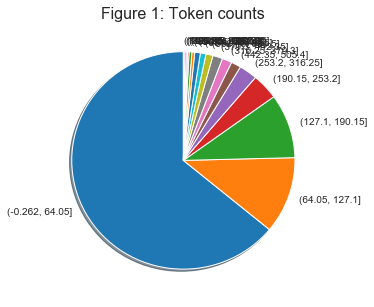

In [26]:
df_tokens.plot.pie(shadow=True, startangle=90, figsize=(5, 5))
plt.title('Figure 1: Token counts', fontsize=16)
plt.show()

- How about choosing top five categories? 

In [27]:
df_tokens_5 = df_eli_short.token_count.value_counts(bins=20).head(5)
df_tokens_5.name = ''
df_tokens_5

(-0.262, 64.05]    315
(64.05, 127.1]      56
(127.1, 190.15]     47
(190.15, 253.2]     19
(253.2, 316.25]     13
Name: , dtype: int64

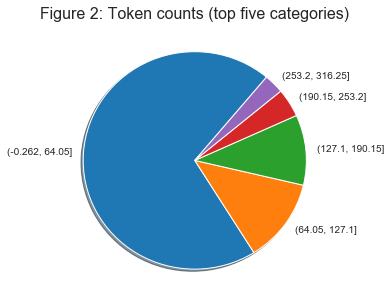

In [28]:
df_tokens_5.plot.pie(shadow=True, startangle=50, figsize=(5, 5))
plt.title('Figure 2: Token counts (top five categories)', fontsize=16)
plt.show()

### Summary

- Now, we know that the length of texts are not distributed well. Most of them are under 75 tokens.

### 2. Value count by native language
- Maybe we can do some simple analysis, such as native language, to help us look through the data.

In [29]:
df_native = df_eli_short.native_language.value_counts()
df_native

Arabic        113
Korean         97
Chinese        81
Japanese       28
Spanish        15
Thai           15
Turkish        12
Portuguese      7
Taiwanese       5
Other           5
French          5
Italian         2
English         2
Russian         2
Farsi           1
Swedish         1
Polish          1
Name: native_language, dtype: int64

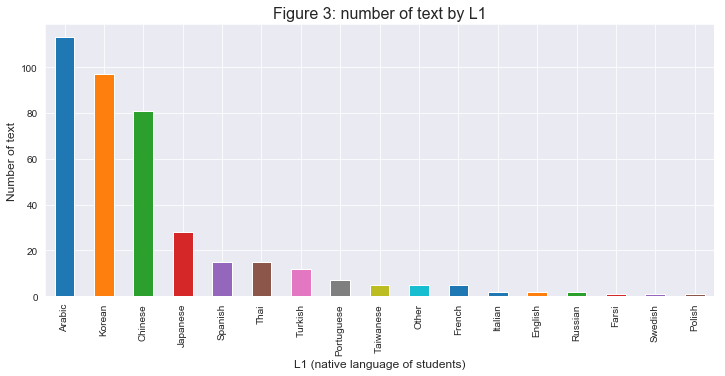

In [30]:
df_native.plot(kind='bar', figsize=(12,5))   # Not saving output as a plot object
plt.title('Figure 3: number of text by L1', fontsize=16)          # Must use plt.title(), plt.xlabel() etc. 
plt.xlabel('L1 (native language of students)', fontsize=12)
plt.ylabel('Number of text', fontsize=12)
plt.show()

- The output above is counted by text. We may want to look at the number of total students and the number of essay they write.
- Let's go through the data.

In [31]:
df_eli_short.student_id.value_counts().head(10)

cx0    5
es9    5
cp5    4
bs1    4
gv1    4
cs5    3
ay1    3
bm7    3
fs4    3
dc1    3
Name: student_id, dtype: int64

In [32]:
df_eli_short.student_id.value_counts().describe()

count    353.000000
mean       1.393768
std        0.715626
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: student_id, dtype: float64

In [33]:
df_eli_short.student_id.describe()

count     492
unique    353
top       cx0
freq        5
Name: student_id, dtype: object

### Summary

- We can understand that there are 492 texts in the dataframe.
- These texts are written by 353 students.
- The max number of essays students wrote is 4.
- Students write 1.44 essay in average.